In [1]:
import tensorflow as tf
import PIL
import numpy as np

C:\Users\CAGUSER\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CAGUSER\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CAGUSER\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CAGUSER\AppData\Roaming\Python\Python

In [3]:
from PIL import Image
from scipy import ndimage
import scipy
import matplotlib.pyplot as plt

In [4]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [5]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

W1009 11:01:56.725178  6700 deprecation.py:506] From C:\Users\CAGUSER\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:
cat_image_id = os.listdir('images/cat')[0]

cat_image = load_image(os.path.join('images/cat',cat_image_id))

print(f'shape: {cat_image.shape}')
print(f'type: {type(cat_image)}')

predicted_result = model.predict(cat_image)

print(predicted_result.shape)

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>
(1, 1000)


(380, 760, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


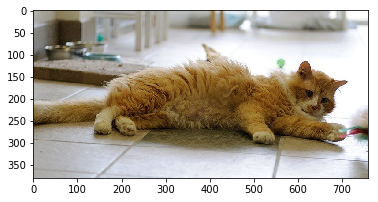

In [7]:
my_image = "0b1bb2a5d4.jpg" # change this to the name of your image file 

fname = "images/cat/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))

plt.imshow(image)
print(image.shape)

In [8]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [9]:
predicted_result = model.predict(cat_image)
print(predicted_result.shape)

(1, 1024)


In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)

x = Dropout(rate=0.4)(model.output)
x = Dense(3)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [12]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy'
)

In [14]:
from tensorflow.keras.applications import mobilenet as _mobilenet

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    './images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    './images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 634 images belonging to 3 classes.
Found 70 images belonging to 3 classes.


In [16]:
from keras_tqdm import TQDMNotebookCallback

# keras, model definition...
#cb = TQDMNotebookCallback()
#setattr(TQDMNotebookCallback(),'on_train_batch_begin',lambda x,y:None)
#setattr(TQDMNotebookCallback(),'on_train_batch_end',lambda x,y:None)

batch_size = 32

history = model.fit_generator(
    generator=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=3,
    #callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)],
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/3
19/19 [==============================] - ETA: 1:57 - loss: 3.310 - ETA: 1:38 - loss: 2.750 - ETA: 1:31 - loss: 2.461 - ETA: 1:25 - loss: 2.156 - ETA: 1:16 - loss: 1.999 - ETA: 1:12 - loss: 1.851 - ETA: 1:06 - loss: 1.762 - ETA: 1:00 - loss: 1.676 - ETA: 53s - loss: 1.611 - ETA: 47s - loss: 1.61 - ETA: 41s - loss: 1.56 - ETA: 36s - loss: 1.49 - ETA: 30s - loss: 1.44 - ETA: 25s - loss: 1.40 - ETA: 20s - loss: 1.38 - ETA: 15s - loss: 1.35 - ETA: 9s - loss: 1.3007 - ETA: 4s - loss: 1.264 - 96s 5s/step - loss: 1.2261 - val_loss: 0.6009
Epoch 2/3
19/19 [==============================] - ETA: 1:15 - loss: 1.261 - ETA: 1:13 - loss: 0.897 - ETA: 1:10 - loss: 0.819 - ETA: 1:05 - loss: 0.799 - ETA: 1:01 - loss: 0.752 - ETA: 57s - loss: 0.759 - ETA: 52s - loss: 0.79 - ETA: 46s - loss: 0.75 - ETA: 42s - loss: 0.71 - ETA: 38s - loss: 0.67 - ETA: 34s - loss: 0.67 - ETA: 30s - loss: 0.65 - ETA: 25s - loss: 0.62 - ETA: 21s - loss: 0.63 - ETA: 17s - loss: 0.61 - ETA: 12s - loss: 0.62 - ETA: 8s

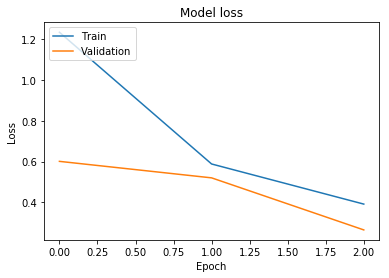

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
# elon_with_disguise = load_image('elon_with_disguise.png')
# elon_without_disguise = load_image('elon_no_disguise.jpg')

import random 

random_cat = random.choice(os.listdir('images/cat/'))
cat_path = os.path.join('images/cat',random_cat)
cat = load_image(cat_path)

random_dog = random.choice(os.listdir('images/dog/'))
dog_path = os.path.join('images/dog',random_dog)
dog = load_image(dog_path)

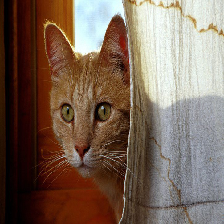

In [23]:
tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))

In [28]:
predicted_result = model.predict(cat)

In [29]:
print(predicted_result)

[[9.9942720e-01 4.4521614e-04 1.2765238e-04]]


In [33]:
print(np.amax(predicted_result))

0.9994272


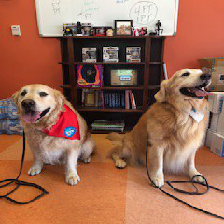

In [25]:
tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

In [36]:
predicted_result = model.predict(dog)
print(predicted_result)

[[0.14074738 0.85385424 0.00539842]]
